#### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [87]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [4]:
df.to_csv('googleplaystore.csv')

In [61]:
print("The dataset have (rows,columns):",df.shape)

The dataset have (rows,columns): (10841, 14)


#### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [62]:
df.drop_duplicates(keep='first', inplace = True)
df['Rating'].fillna(df['Rating'].median(),inplace=True)

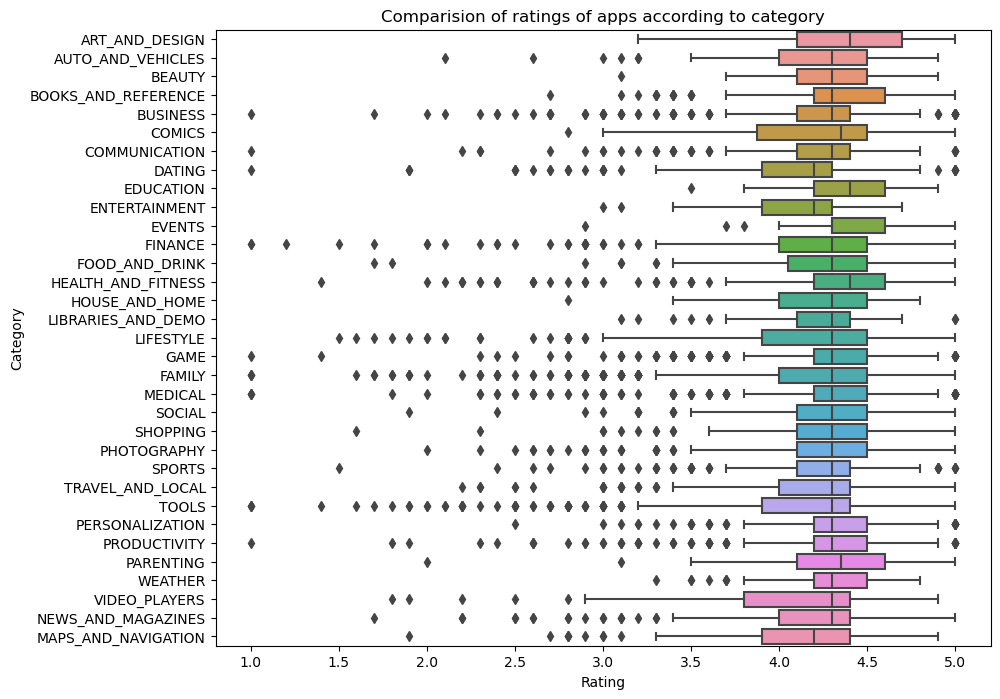

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.boxplot(x='Rating',y='Category',data=df )
plt.title('Comparision of ratings of apps according to category')
plt.show()

Every Category seems to have similar ratings generally ranging from 3 to 5 apart from outliars.

#### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [64]:
print('No. of missing values of each feature: \n',df.isnull().sum())

No. of missing values of each feature: 
 Unnamed: 0           0
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


Missing values in a dataset can have various impacts, depending on the nature and extent of the missing data. Here are some ways missing values can affect a dataset:

1. Bias: Missing values can introduce bias in the analysis and interpretation of data. If the missingness is not random and is related to the variable being measured, it can lead to biased estimates and incorrect conclusions.

1. Reduced sample size: Missing values reduce the effective sample size, which can affect the statistical power of the analysis. With a smaller sample size, the estimates may be less precise and have wider confidence intervals.

1. Data completeness: Missing values can result in incomplete data, which may limit the scope of analysis. Certain statistical techniques and algorithms require complete data for accurate results, and missing values can restrict the applicability of such methods.

1. Distortion of relationships: Missing values can distort the relationships between variables. For example, if there is a strong relationship between two variables, but one variable has a high proportion of missing values, the strength of the relationship may be underestimated or obscured.

1. Imputation challenges: When dealing with missing values, imputation techniques are often used to fill in the missing data. However, the quality of imputed values can vary, and the imputation process itself introduces uncertainty and potential errors into the analysis.

1. Skewed analysis results: Missing values can lead to biased summary statistics, such as means, variances, and correlations. The estimated values may not accurately reflect the true population values, and this can impact subsequent analysis and decision-making.

#### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
df['Size']=df['Size'].replace('Varies with device',np.nan)
df['Size']=df['Size'].astype(float)

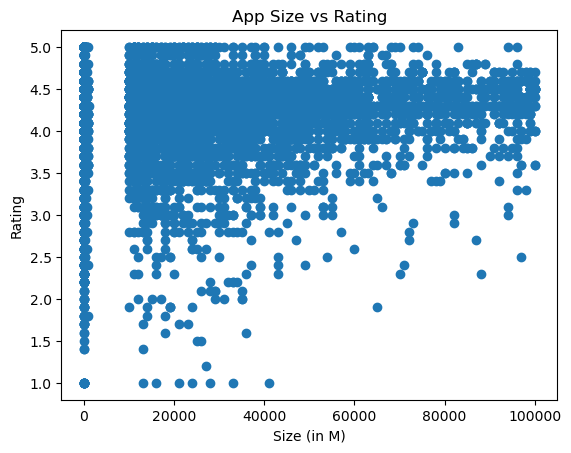

In [123]:
plt.scatter(x='Size', y='Rating',data=df)
plt.xlabel('Size (in M)')
plt.ylabel('Rating')
plt.title('App Size vs Rating')
plt.show()

It seems, more the app size better the app ratings. However maximum ratings are higher than 2.5 regardless their size. The sweet spot is between 10000M to 40000M.

#### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [74]:
df['Price']=df['Price'].str.replace('$','')
df['Price']=df['Price'].astype('float')

/tmp/ipykernel_119/1895281583.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price']=df['Price'].str.replace('$','')


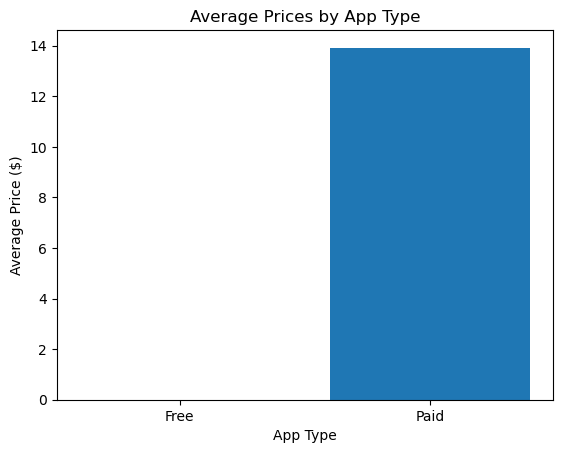

In [139]:
# Group the data by app type and calculate the average price
average_prices = df.groupby('Type')['Price'].mean()

# Create a bar chart
plt.bar(average_prices.index, average_prices)
plt.xlabel('App Type')
plt.ylabel('Average Price ($)')
plt.title('Average Prices by App Type')

# Show the plot
plt.show()

It seems, average price of apps of type Free is 0 and that of paid is 13.92.

#### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [171]:
df['Installs']=df['Installs'].str.replace('+','')
df['Installs']=df['Installs'].str.split(',')
df['Installs']=df['Installs'].str.join('')
df['Installs']=df['Installs'].astype('int')

In [176]:
frequency_table = df.groupby('App')['Installs'].sum().sort_values(ascending=False)

top_10_apps = frequency_table.head(10)

print('Most Popular apps are:\n',top_10_apps)

Most Popular apps are:
 App
Subway Surfers                  6000000000
Google News                     4000000000
Hangouts                        4000000000
Google Drive                    4000000000
Google Photos                   4000000000
Instagram                       4000000000
Candy Crush Saga                3500000000
Maps - Navigate & Explore       3000000000
Google Chrome: Fast & Secure    3000000000
WhatsApp Messenger              3000000000
Name: Installs, dtype: int64


#### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

I would make frequency table of most popular categories with respect to the no. of installs and present top 10 categories and recommend to develop the app accordingly.

In [177]:
frequency_table = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

top_10_apps = frequency_table.head(10)

print('Most Popular Categories are:\n',top_10_apps)

Most Popular Categories are:
 Category
GAME                  35086024415
COMMUNICATION         32647276251
PRODUCTIVITY          14176091369
SOCIAL                14069867902
TOOLS                 11452771915
FAMILY                10258263505
PHOTOGRAPHY           10088247655
NEWS_AND_MAGAZINES     7496317760
TRAVEL_AND_LOCAL       6868887146
VIDEO_PLAYERS          6222002720
Name: Installs, dtype: int64


#### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

Since, The given dataset have no information regarding App developers, I could not give answer according to the context but here is what I would do in general.


Features to analyze:

- Total downloads - Identify developers with the highest total number of downloads across all their apps. Total downloads is a good indicator of popularity and success.

- Ratings - Look at average ratings for developers' apps. Higher average ratings suggest better quality and more satisfied users.

- Revenue generation - If the data includes earnings or in-app purchase info, analyze total revenue generated by each developer. Higher revenue developers are more successful businesses.

- App categories - Identify which categories (games, tools, etc.) tend to be most popular and profitable. This gives insights on where to focus development efforts.

- Retention and engagement - How long do users keep apps from each developer installed? More engaged, loyal user bases are more valuable.

Visualizations to use:

- Bar charts - To compare total downloads, revenue, or other metrics across top developers. This easily shows leaders.

- Treemap charts - To showcase developers' performance across different app categories in a space-filling layout.

- Line charts - To view metrics like downloads or ratings over time for popular developers. Useful for understanding growth trends.

- Geographic maps - To analyze which countries/regions users of each developer are primarily located in. Helps with localization strategy.

The analysis would identify top performing developers and apps as examples to learn from. The visuals would clearly present findings to help the company optimize its approach.

#### Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

Since, The given dataset has no useful features to identify the best time to launch a new app I could not give the answer to the context. But here is how I would deal with it in general:

Features to analyze:

- Daily/weekly/monthly download volumes - To see seasonality and peak periods of app adoption.
- App installs and updates by date - To track trends over time and spot growth opportunities.
- Release date and ranking changes - To correlate new app launches and ranking boosts.
- User activity and engagement metrics by date - Like DAU, WAU, session lengths over time.

Visualizations to use:

- Line charts - To clearly depict download/activity trends over different time periods like months, quarters, years.
- Seasonal decomposition charts - To isolate seasonal, trend, and random components of time series data.
- Heat maps - To visualize app installs or other metrics by date, showing peak periods as hotspots.
- Scatter plots - To correlate app features like rating or price with download volumes by date.

The analysis would identify historically busy app adoption periods and growth opportunities based on date-related app performance patterns. The visuals would help spot seasonal trends and optimal launch timing for maximum visibility and uptake. This would provide clear recommendations on when to debut a new app.